#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
import seaborn as sns


# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [80]:
# Reading the data using pandas
mnist = mnist.load_data()

(X_train, y_train), (X_test, y_test) = mnist
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])


# print first five rows of df
#X = X.reshape(X.shape[0], -1)

In [81]:
X = X.reshape(X.shape[0], -1)

In [82]:
df = pd.DataFrame(X)
df['label'] = y


In [83]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [66]:
df.isnull().sum()

7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64

In [84]:
# Drop the label feature and
# store the pixel data in d.
d = df.drop("label", axis=1)


# Step 3  :
## Standardize the data

In [86]:
# Data-preprocessing: Standardizing the data
standardized = StandardScaler().fit_transform(d)
print(standardized.shape)

(70000, 784)


# Step 4 :  Reduce the columns data to 2 dimensions




In [88]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized[0:1000, :]

In [90]:
# Assuming 'label' column exists in the original dataframe 'df'
labels = df['label']
# Extract labels from the original dataframe
labels_1000 = labels[0:1000]

# Step 5 :
## define the model

In [91]:


# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

model = TSNE(n_components=2, perplexity=30.0, learning_rate=200, n_iter=1000)

# Step 6 :
## Fit the model

In [93]:

# creating a new data frame which
# help us in plotting the result data
t_sne_data = model.fit_transform(data_1000)
t_sne_data = np.vstack((t_sne_data.T, labels_1000)).T
t_sne_df = pd.DataFrame(data = t_sne_data,
     columns =("Dim1", "Dim2", "label"))



# Step 7 :
##  Plotting the result

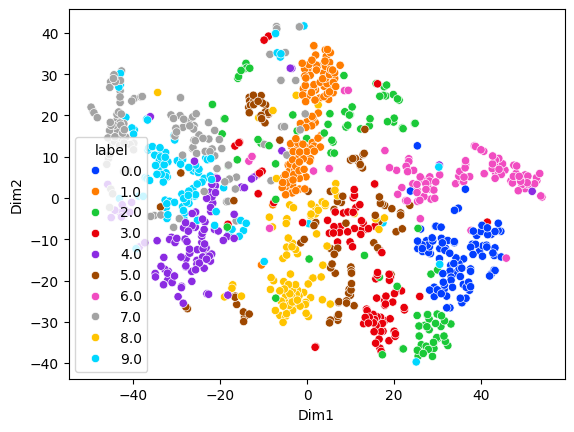

In [95]:
# Plotting the result of tsne

sns.scatterplot(data=t_sne_df, x='Dim1', y='Dim2',hue='label', palette="bright")
plt.show()

#**Well Done**